# Project Description: Dự Đoán Giá Nhà

## Mô tả dữ liệu:

Dataset bao gồm 100 hàng và ba cột:

1. Width: Chiều rộng của ngôi nhà (tính bằng mét).

2. Length: Chiều dài của ngôi nhà (tính bằng mét).

3. Price: Giá bán của ngôi nhà (tính bằng triệu VND).

## Mục tiêu:

Xây dựng một mô hình Linear Regression dự đoán giá nhà dựa trên các đặc trưng về kích thước nhà, bao gồm chiều rộng (width) và chiều dài (length).

## Level 2 - Sử dụng thư viện Linear Regression sklearn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_csv('C:/Users/84909/Linear Regression/Datasets/House_Price_2.csv')

## Descriptive Statistics

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   width   100 non-null    int64  
 1   length  100 non-null    int64  
 2   price   100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [13]:
X = df[['width','length']]
X.shape

(100, 2)

In [14]:
y = df['price']
y.shape

(100,)

In [15]:
Z = np.concatenate([X, np.ones((X.shape[0], 1))], axis=-1)   ## thêm một cột vào sau X và gán vào Z
Z[:5]

array([[28., 97.,  1.],
       [21., 62.,  1.],
       [27., 64.,  1.],
       [ 5., 92.,  1.],
       [13., 84.,  1.]])

C:\Users\84909\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\84909\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\84909\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


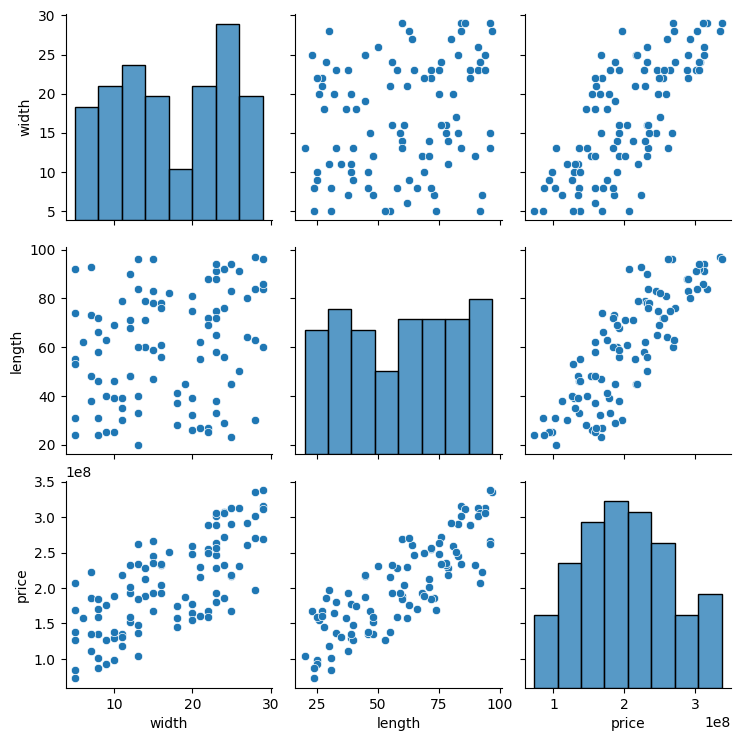

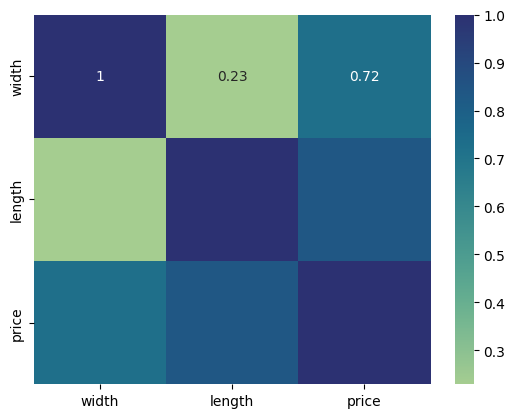

In [16]:
# Pairplot
sns.pairplot(df)
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

## 4. Split the Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
reg = LinearRegression().fit(X_train, y_train)

In [29]:
theta = reg.coef_
theta

array([4980847.15999836, 1996615.88182158])

In [32]:
theta0 = reg.intercept_

In [33]:
y_pred = reg.predict(X_test)

In [34]:
MSE = np.mean((y_pred - y_test)**2)
MSE

12778384960787.172

In [35]:
MAE = np.mean(np.abs(y_pred - y_test))
MAE

2615476.617371138

## Predict

In [36]:
width = 15
length = 10

In [37]:
y_pred = theta[0] * width + theta[1] * length + theta0
y_pred

96136550.66668653

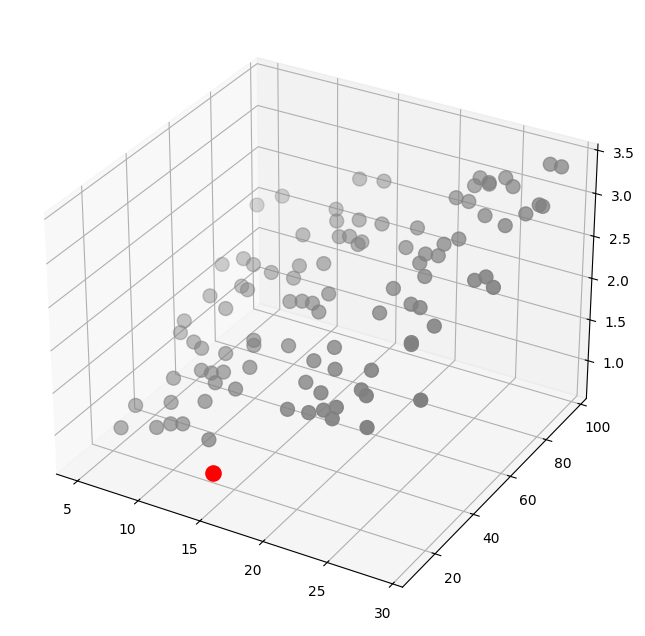

In [38]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")
ax.scatter3D(df.width, df.length, df.price, color = 'gray', s = 100)
ax.scatter3D(width, length, y_pred, color = 'red', s = 120)
#plt.show()